In [ ]:
# Group Members: Noah Dyck, Christoph Schmidt, Jonathan Frohn
# Solutions for Sheet 02:

In [ ]:
"""
Exercise 2:
"""

MSE PCA 0.5888340007236236
MSE ICA 1.6893597678485632


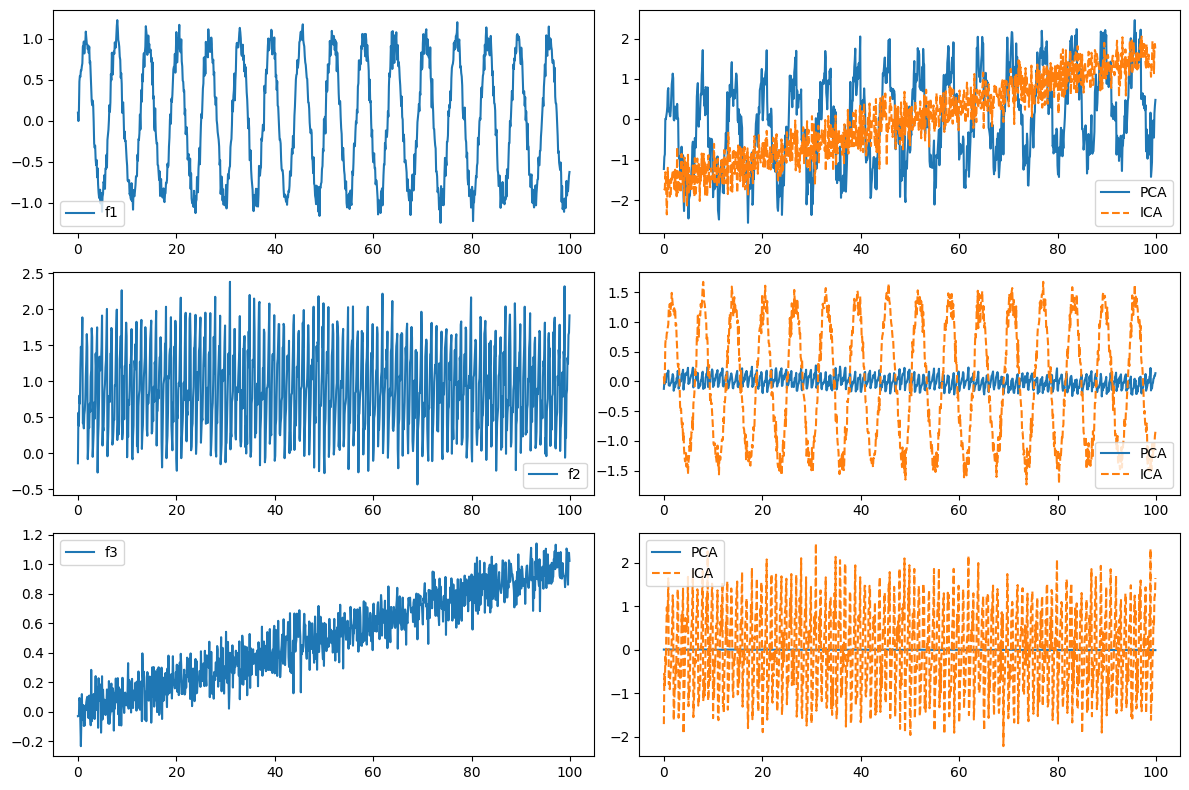

In [16]:
# a)

# sources: https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html
# https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.FastICA.html

import numpy as np
import matplotlib.pyplot as plt

length = 100 #length of time series
mean_gaussian_noise = 0
std_gaussian_noise = 100 # mean and standarddeviation of gaussian noise
time = np.arange(0, length, 0.1)

mu1 = np.random.normal(mean_gaussian_noise, std_gaussian_noise, len(time))
mu2 = np.random.normal(mean_gaussian_noise, std_gaussian_noise, len(time))
mu3 = np.random.normal(mean_gaussian_noise, std_gaussian_noise, len(time))

f1 = np.sin(time) + 0.001 * mu1
f2 = 2 * (time - np.floor(time)) + 0.002 * mu2
f3 = 0.01 * time + 0.001 * mu3

# matrix of three functions
F = np.vstack([f1, f2, f3]).T

# random matrix
A = np.random.rand(3, 3)
X = F @ A.T

from sklearn.decomposition import PCA, FastICA

# do pca and ica via sklearn
pca_components = PCA(n_components=3).fit_transform(X)
ica_components = FastICA(n_components=3, random_state=0).fit_transform(X)

from sklearn.metrics import mean_squared_error

mse_pca = mean_squared_error(F, pca_components)
mse_ica = mean_squared_error(F, ica_components)

print("MSE PCA", mse_pca)
print("MSE ICA", mse_ica)

# original and reconstructed data visualized
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
for i in range(3):
    axes[i, 0].plot(time, F[:, i], label='f' + str(i+1))
    axes[i, 1].plot(time, pca_components[:, i], label='PCA')
    axes[i, 1].plot(time, ica_components[:, i], label='ICA', linestyle='--')
    axes[i, 1].legend()
    axes[i, 0].legend()

plt.tight_layout()
plt.show()